In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_set = pd.read_csv('heart.csv')
train_set.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
train_set.shape

(303, 14)

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

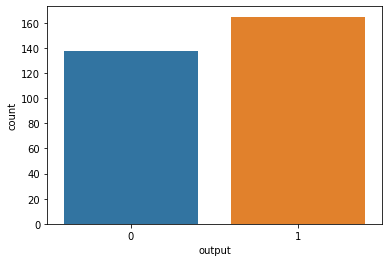

In [5]:
sns.countplot(train_set['output'])
#balanced dataset

In [7]:
#chest pain - cp
train_set.groupby('cp').size()  

cp
0    143
1     50
2     87
3     23
dtype: int64

In [8]:
train_set['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [9]:
# restecg
train_set.groupby('restecg').size()  

restecg
0    147
1    152
2      4
dtype: int64

In [10]:
one_hot_encoded_data = pd.get_dummies(train_set, columns = ['cp', 'restecg'])
train_set = one_hot_encoded_data

In [11]:
train_set

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,0,1,1,0,0,0,1,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,2,1,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,2,1,0,1,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,2,0,2,1,0,1,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,2,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,3,0,1,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,1,0,3,0,0,0,0,1,0,1,0
300,68,1,144,193,1,141,0,3.4,1,2,3,0,1,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,1,1,3,0,1,0,0,0,0,1,0


<AxesSubplot:>

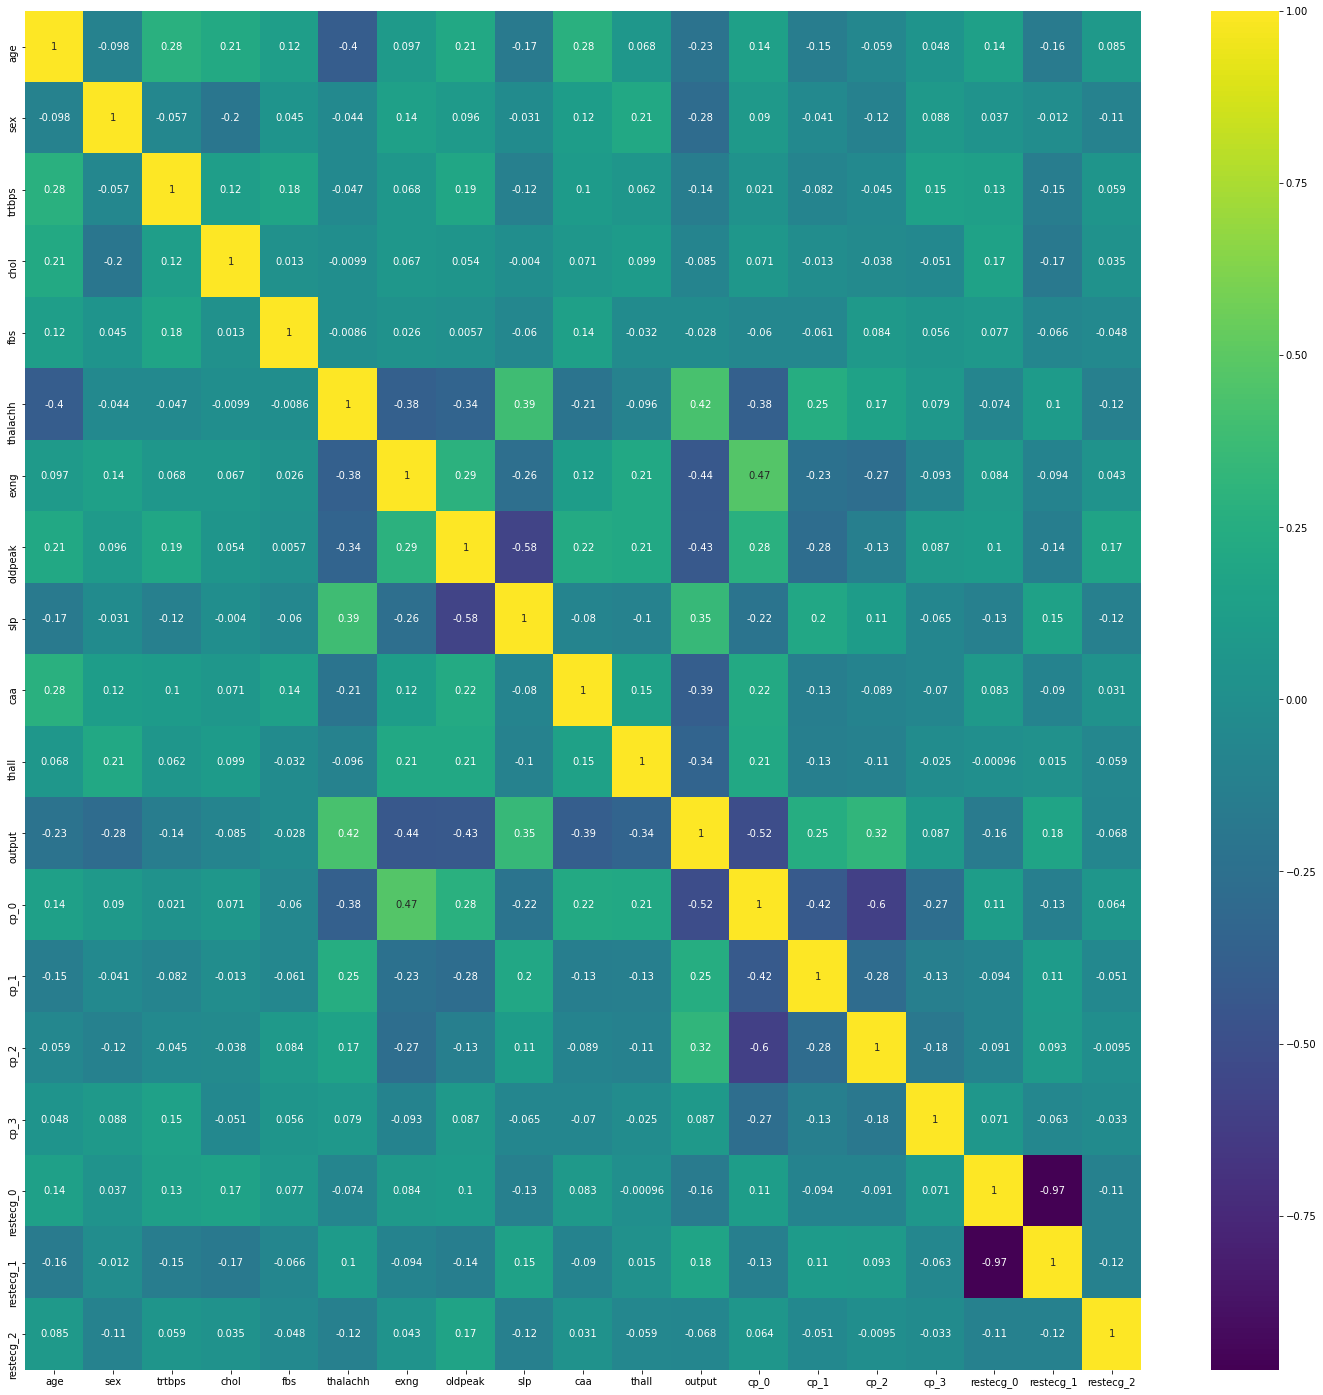

In [13]:
corr = train_set.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True, cmap = 'viridis')

As we can see above on heatmap, rest2 and rest1 columns have strong negative correlation rate(-0.97), So one of them can be removed from columns of dataset. 

In [14]:
train_set.drop(columns={'restecg_2'},inplace=True)

After data preprocessing part, train and test datas seperated from each other.

In [15]:
x = train_set.drop(columns={'output'})
y = train_set['output']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size=0.15, random_state=31)
x_train.shape, x_test.shape , y_train.shape , y_test.shape

((257, 17), (46, 17), (257,), (46,))

In [17]:
#Scale train datas
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

#1-Standart Scaler
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.fit_transform(x_test)

#2-Standart MinMaxScaler
scaler = MinMaxScaler()
x_train_mm = scaler.fit_transform(x_train)
x_test_mm = scaler.fit_transform(x_test)

#3-Standart Normalizer
scaler = Normalizer()
x_train_n = scaler.fit_transform(x_train)
x_test_n = scaler.fit_transform(x_test)

#4-Standart RobustScaler
scaler = RobustScaler()
x_train_rb = scaler.fit_transform(x_train)
x_test_rb = scaler.fit_transform(x_test)

**1. SVM**

In [18]:
#Support Vector Machines model is used for select the best scale technique as cross-validation score of fit-svm classifier.
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model_svm = SVC()
scores = cross_val_score(model_svm,x_train_st,y_train,cv=10)
scores , scores.mean()

(array([0.80769231, 0.73076923, 0.84615385, 0.84615385, 0.88461538,
        0.84615385, 0.88461538, 0.84      , 0.84      , 0.76      ]),
 0.8286153846153846)

**2. Naive Bayes**

In [19]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
scores = cross_val_score(model_naive,x_train_st,y_train,cv=10)
scores, scores.mean()

(array([0.76923077, 0.88461538, 0.80769231, 0.84615385, 0.92307692,
        0.88461538, 0.73076923, 0.72      , 0.76      , 0.76      ]),
 0.8086153846153845)

**3. Decision Tree**

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
scores = cross_val_score(model_tree,x_train_st,y_train,cv=10)
scores, scores.mean()

(array([0.61538462, 0.65384615, 0.73076923, 0.76923077, 0.76923077,
        0.88461538, 0.69230769, 0.8       , 0.84      , 0.56      ]),
 0.7315384615384616)

**4. Random Forest**

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
scores = cross_val_score(model_rf,x_train_st,y_train,cv=10)
scores, scores.mean()

(array([0.80769231, 0.80769231, 0.80769231, 0.84615385, 0.88461538,
        0.88461538, 0.73076923, 0.84      , 0.8       , 0.72      ]),
 0.812923076923077)

**5. KNN**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(model_knn,x_train_st,y_train,cv=10)
scores, scores.mean()

(array([0.80769231, 0.80769231, 0.80769231, 0.84615385, 0.92307692,
        0.73076923, 0.73076923, 0.84      , 0.76      , 0.72      ]),
 0.7973846153846152)

**6. Logistic Regression**

In [23]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
scores = cross_val_score(model_lr,x_train_st,y_train,cv=10)
scores, scores.mean()

(array([0.76923077, 0.76923077, 0.88461538, 0.92307692, 0.84615385,
        0.84615385, 0.76923077, 0.8       , 0.76      , 0.72      ]),
 0.8087692307692308)

**7. Logistic Regression**

In [24]:
!pip install xgboost

In [25]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
scores = cross_val_score(model_xgb,x_train_st,y_train,cv=10)
scores, scores.mean()

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(array([0.76923077, 0.76923077, 0.80769231, 0.84615385, 0.84615385,
        0.84615385, 0.73076923, 0.88      , 0.8       , 0.72      ]),
 0.8015384615384615)

As results, best-performance models are:
1. SVM ()
2. RandomForests ()
3. KNeighbor ()

In [26]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train_st,y_train)
pred_test = model_rf.predict(x_test_st)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test.values,pred_test)
acc                                                  
           
#3 model is trained and getting accuracy of them.
#As a result, Number2(RandomForests) has best accuracy point.

0.8043478260869565

In [29]:
print('Last Accuracy of selected model is: ', round(acc,3)*100, '%')

Last Accuracy of selected model is:  80.4 %
